<a href="https://colab.research.google.com/github/AhmedAboushanab/Free-Work/blob/main/Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
def trinucleotide_frequencies(genome: str) -> dict[str, float]:
  nucleotides = ["A", "C", "T", "G"] # The different types of nucleotides
  total_trinucleotides = 0 #The number of overlapping dinucleotides in the sequence
  counts = {} #A dictionary containing the overlapping dinucleotides as keys and their corresponding counts (frequencies) as the values
  #Intialize the counts with zeroes
  for nt1 in nucleotides:
    for nt2 in nucleotides:
      for nt3 in nucleotides:
        trinucleotide = nt1 + nt2 + nt3
        counts[trinucleotide] = 0
  #Go over the overlapping dinucleotides in the sequence and calculate the counts
  for i in range(len(genome)-2):
    trinucleotide = genome[i] + genome[i+1] + genome[i+2]
    counts[trinucleotide] += 1
    total_trinucleotides += 1

  #Convert the counts to frequencies by dividing by the number of overlapping dinucleotides
  for trinucleotide in counts.keys():
    counts[trinucleotide] = round(counts[trinucleotide]/total_trinucleotides, 3)
  return counts


In [6]:
#!pip install biopython

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 12.0 MB/s eta 0:00:00


In [122]:
import requests
from io import StringIO
from Bio import SeqIO
import pandas as pd

from Bio.SeqUtils import GC
url = "https://raw.githubusercontent.com/ahmedmoustafa/datasets/main/genomes/bacteria.fa"
response = requests.get(url)
fasta_content = StringIO(response.text)

print("ID", "\t", "Sequence", "\t", "GC-content")

for record in SeqIO.parse(fasta_content, "fasta"):
  print(record.id, "\t", record.seq[:10], "\t", GC(record.seq), trinucleotide_frequencies(record.seq))

ID 	 Sequence 	 GC-content


/usr/local/lib/python3.10/dist-packages/Bio/SeqUtils/__init__.py:144: BiopythonDeprecationWarning: GC is deprecated; please use gc_fraction instead.
  warnings.warn(


NC_000913 	 AGCTTTTCAT 	 50.79070985933456 {'AAA': 0.023, 'AAC': 0.018, 'AAT': 0.018, 'AAG': 0.014, 'ACA': 0.013, 'ACC': 0.016, 'ACT': 0.011, 'ACG': 0.016, 'ATA': 0.014, 'ATC': 0.019, 'ATT': 0.018, 'ATG': 0.016, 'AGA': 0.012, 'AGC': 0.017, 'AGT': 0.011, 'AGG': 0.011, 'CAA': 0.017, 'CAC': 0.014, 'CAT': 0.017, 'CAG': 0.023, 'CCA': 0.019, 'CCC': 0.01, 'CCT': 0.011, 'CCG': 0.019, 'CTA': 0.006, 'CTC': 0.009, 'CTT': 0.014, 'CTG': 0.022, 'CGA': 0.015, 'CGC': 0.025, 'CGT': 0.016, 'CGG': 0.019, 'TAA': 0.015, 'TAC': 0.011, 'TAT': 0.014, 'TAG': 0.006, 'TCA': 0.018, 'TCC': 0.012, 'TCT': 0.012, 'TCG': 0.015, 'TTA': 0.015, 'TTC': 0.018, 'TTT': 0.024, 'TTG': 0.017, 'TGA': 0.018, 'TGC': 0.021, 'TGT': 0.013, 'TGG': 0.018, 'GAA': 0.018, 'GAC': 0.012, 'GAT': 0.019, 'GAG': 0.009, 'GCA': 0.021, 'GCC': 0.02, 'GCT': 0.017, 'GCG': 0.025, 'GTA': 0.011, 'GTC': 0.012, 'GTT': 0.018, 'GTG': 0.014, 'GGA': 0.012, 'GGC': 0.02, 'GGT': 0.016, 'GGG': 0.01}
NC_000962 	 TTGACCGATG 	 65.61466628826449 {'AAA': 0.005, 'AAC':

In [120]:
record[0]

'T'

In [135]:
#records = list(SeqIO.parse("example.fasta", "fasta"))
#print(records[0].id)  # first record
#print(records[-1].id)
url = "https://raw.githubusercontent.com/ahmedmoustafa/datasets/main/genomes/bacteria.fa"
response = requests.get(url)
fasta_content = StringIO(response.text)

Genomes = list(SeqIO.parse(fasta_content, "fasta"))
#print(Genomes[0].id)
#print(Genomes[0].seq[0:10])
NC_000913 = Genomes[0].seq
NC_000962 = Genomes[1].seq
NC_000913_freq = trinucleotide_frequencies(NC_000913)
NC_000962_freq = trinucleotide_frequencies(NC_000962)
#Genomes.
#print(Genomes[1].id)

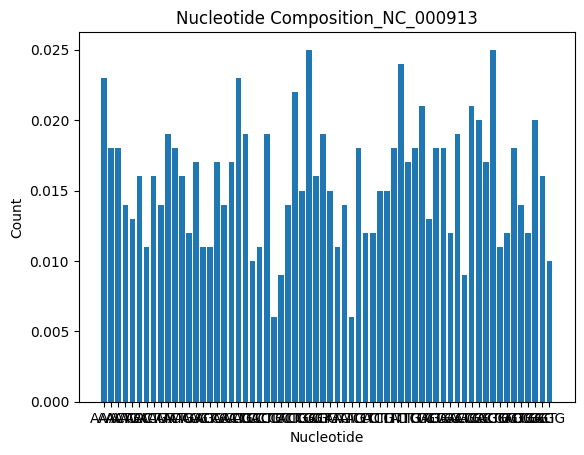

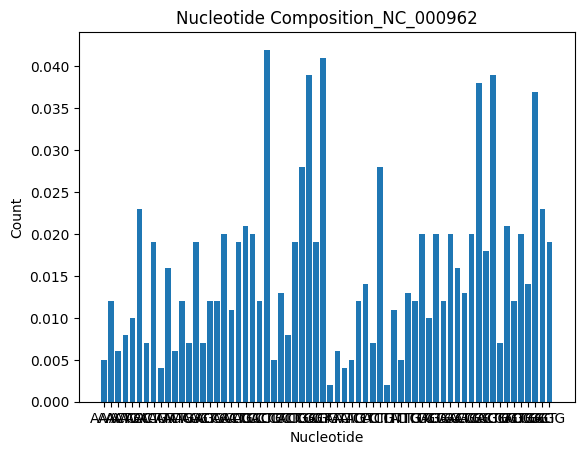

In [136]:
import matplotlib.pyplot as plt
from collections import Counter
import random

#Create a bar plot
plt.bar(NC_000913_freq.keys(), NC_000913_freq.values())
plt.title('Nucleotide Composition_NC_000913')
plt.xlabel('Nucleotide')
plt.ylabel('Count')
plt.show()

plt.bar(NC_000962_freq.keys(), NC_000962_freq.values())
plt.title('Nucleotide Composition_NC_000962')
plt.xlabel('Nucleotide')
plt.ylabel('Count')
plt.show()
